<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Clustering_19_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 19/06/2020

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid,GridSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder, OrdinalEncoder
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import silhouette_samples
random_state = 42

## 1. load the data into a dataframe df, show its size and head, eliminate  the rows containing null values and show the number of remaining rows

In [105]:
df = pd.read_csv("country_stats.csv")
df.head()

,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
3,American Samoa,5.760000e+08,5.760000e+08,10352.822762,10352.822762,NaN,-1.054862,55637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0


In [106]:
print("The size of the data is: ", df.size)
print("The shape of the data is: ",df.shape)

The size of the data is:  1936
The shape of the data is:  (242, 8)


In [107]:
df1 = df.dropna(axis = 0)
print("The shape of the data after removing the rows that contains null values is:",df1.shape)

The shape of the data after removing the rows that contains null values is: (221, 8)


In [108]:
df = df1

## 2.  produce a pairplot of the numeric columns of df and comment relevant situations

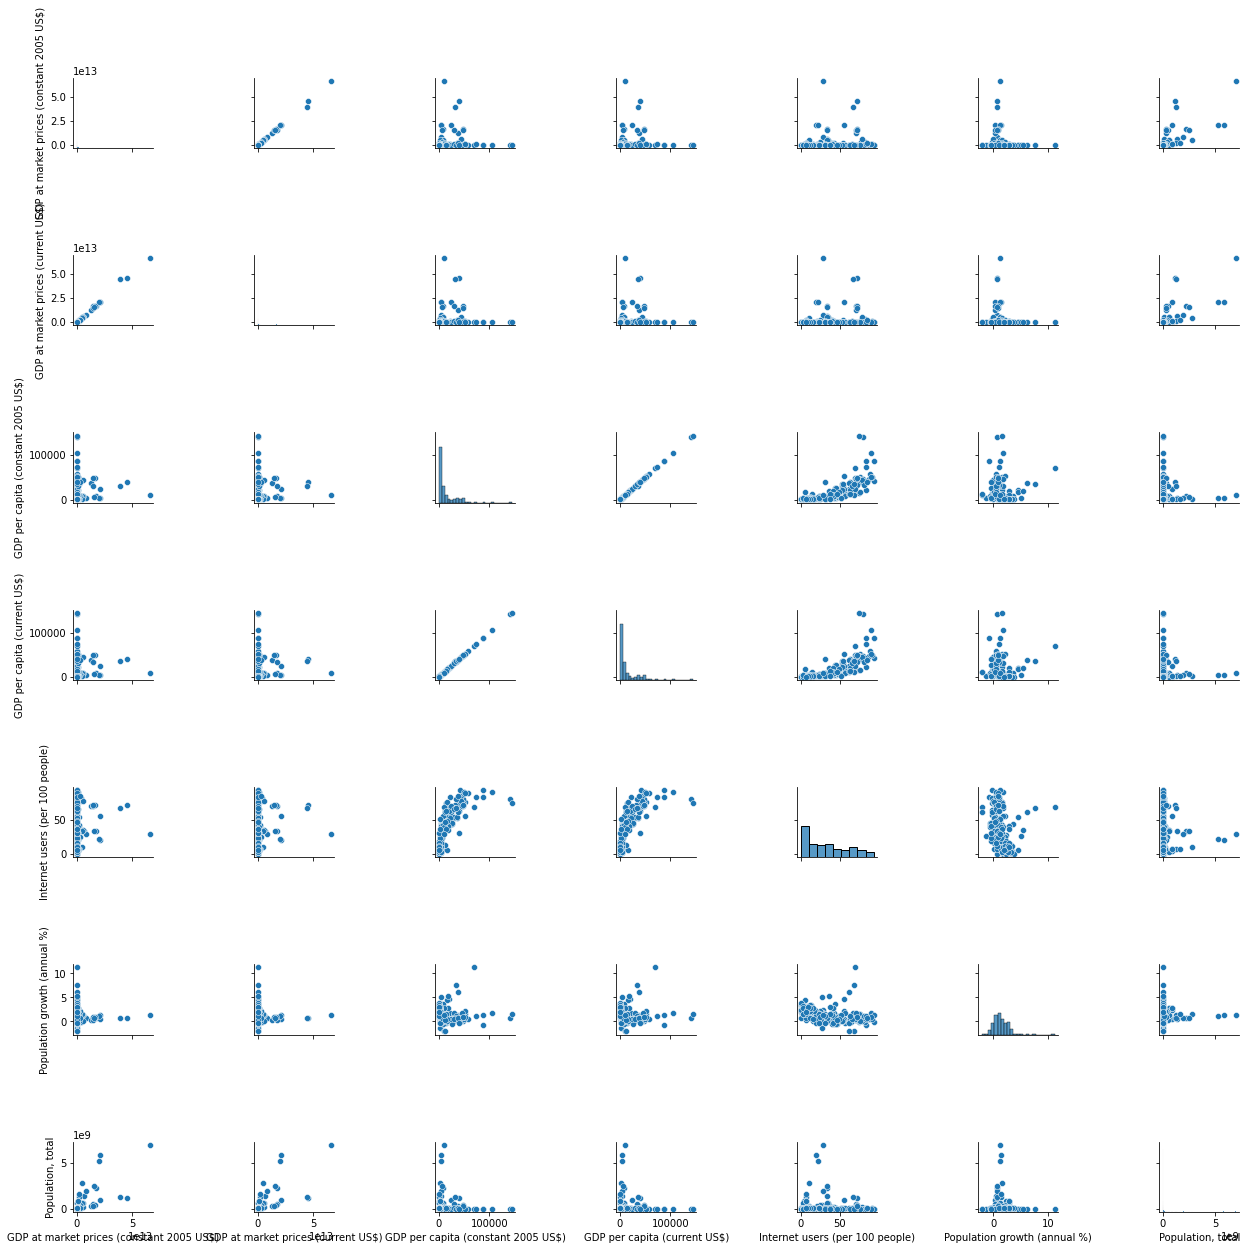

In [109]:
X = df.drop("Country Name",axis = 1)
sns.pairplot(X);

The pairplots don’t seem to highlight any particular situation, the points seem to be grouped 3 together quite often, usually along one of the axes. Only certain plots like (2,4); (3,4); (4,2) seem to show some more interesting configurations.

## 3. Produce a box plot of the numeric columns of df and comment relevant situations

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

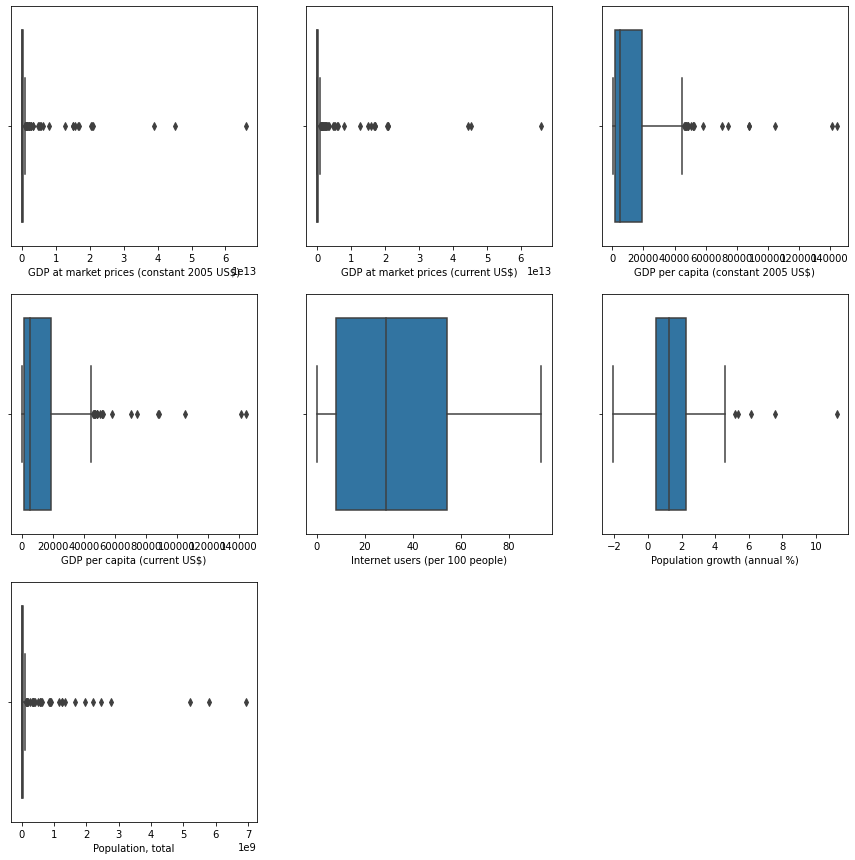

In [110]:
#df.boxplot()
# We will create a big figure and plot them one by one as subplots
plt.figure(figsize=(15,15))
pos = 1
for i in X.columns:
  plt.subplot(3, 3, pos);
  sns.boxplot(X[i]);
  pos += 1


#### The data have a really different order of magnitude so it's necesssary to scale them in order to produce a better clustering model. We can also see that the values of 1,2,7 are really compressed in one area.

## 4.  Produce the correlation matrix of the data and eliminate the redundant attributes, if it is adequate: For example, if attributes a and b have high correlation (e.g.  absolute value higher than 0.95) one of the two can be  eliminated

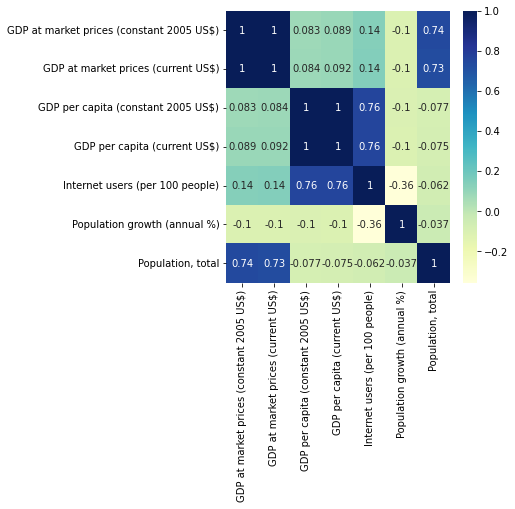

In [111]:
corr = df.corr()
plt.figure(figsize=[5,5])
sns.heatmap(corr,cmap = "YlGnBu",annot = True)

In [112]:
df = df.drop(["GDP at market prices (constant 2005 US$)","GDP per capita (constant 2005 US$)"],axis = 1)

## 5.  Split the reduced data: store the first column in a vector keys and the others in a matrix X

In [113]:
X = df.drop("Country Name",axis = 1)
y = df["Country Name"]


I scale the data because they have a really different magnitude

In [114]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

## 6.  Find the best clustering scheme for the data (possibly reduced after step 4) with a method of your choice, plot global silhouette index for  an appropriate range of hyperparameter(s) and show the chosen hyperparameter(s) 

#### I choose KMeans

In [115]:
n_clusters = range(2,11)
silhouette_scores = []
inertia = []
for cluster in  n_clusters:
  km = KMeans(n_clusters = cluster, random_state = random_state)
  y_km = km.fit_predict(X)
  silhouette_scores.append(silhouette_score(X,y_km))
  inertia.append(km.inertia_)

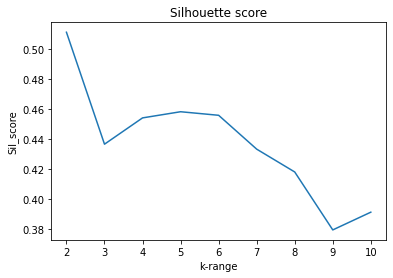

In [116]:
plt.title("Silhouette score")
plt.xlabel("k-range")
plt.ylabel("Sil_score")
plt.plot(list(n_clusters),silhouette_scores);

The best number of clusters is equal to 2

## 7. it the clustering scheme to y, then produce the silhouette plot using  the function plot_silhouette contained in the attached file

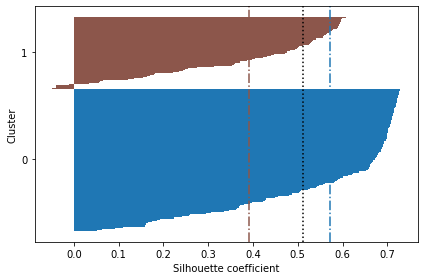

In [117]:
km = KMeans(n_clusters = 2, random_state = random_state)
y_km = km.fit_predict(X)
from plot_silhouette import plot_silhouette
plot_silhouette(silhouette_samples(X,y_km),y_km)

## 8.  Perform a logarithmic transformation of the data. This means simply to apply the log function of numpy. If one of the columns has zero or negative values, avoid its transformation

In [118]:
X = df.drop(["Country Name"], axis = 1)
for column in X.columns:
# We don't want to transform columns with values
# Lower than or equal to zero
  if len(X[column]) != sum(np.greater(X[column], 0)):
    X[column] = np.log(X[column])
X

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,1.593680e+10,553.300289,4.000000,1.034115,2.880317e+07
1,1.192695e+10,4094.358832,45.000000,NaN,2.913021e+06
2,1.612073e+11,4463.394675,12.500000,0.599582,3.611764e+07
4,3.355695e+09,39736.354063,81.000000,NaN,8.444900e+04
5,8.247091e+10,3529.053482,2.800000,1.272593,2.336913e+07
...,...,...,...,...,...
237,8.913100e+09,2338.719877,37.400000,1.064238,3.811102e+06
238,6.595453e+13,9516.346699,28.854046,0.197727,6.930657e+09
239,3.090675e+10,1309.231960,12.350000,0.998068,2.360678e+07
240,2.026556e+10,1463.213573,10.000000,1.058884,1.385003e+07


## 9. repeat point 6 and 7 above and comment the comparison with the result of point 6

In [119]:
X = X.dropna(axis = 0)
n_clusters = range(2,11)
silhouette_scores = []
inertia = []
for cluster in  n_clusters:
  km = KMeans(n_clusters = cluster, random_state = random_state)
  y_km = km.fit_predict(X)
  silhouette_scores.append(silhouette_score(X,y_km))
  inertia.append(km.inertia_)

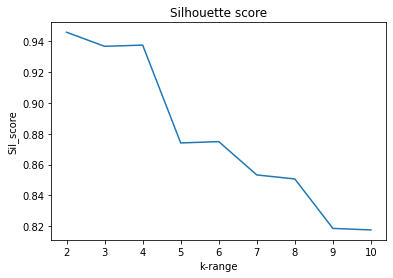

In [120]:
plt.title("Silhouette score")
plt.xlabel("k-range")
plt.ylabel("Sil_score")
plt.plot(list(n_clusters),silhouette_scores);

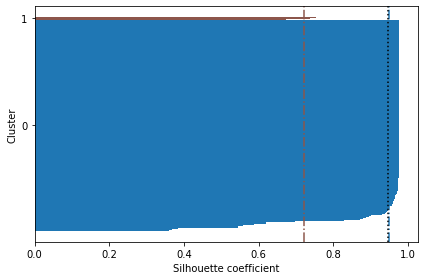

In [121]:
km = KMeans(n_clusters = 2, random_state = random_state)
y_km = km.fit_predict(X)
from plot_silhouette import plot_silhouette
plot_silhouette(silhouette_samples(X,y_km),y_km)

The cluster with the higest silhouette is the cluster number 0